This notebook requires that the following files are saved in the working directory:
1) 'betasam.pdf'
2) 'DBSSystemListCat1_2.csv'

This will be altered when the code is run en masse on all contracts in the database.

This script will do the following:
1) Extract text from the contract PDF
2) Clean the imported contract text
3) Import keywords provided by the Army team
4) Create a list of keywords from the imported file
5) Scan the document for all keywords provided
6) Produce a frequency count of keywords present
7) Output a sorted list of keywords and their counts + plot 

Step 7 is a visual and an optional item to include in the GUI

The necessary output is 'sorted_kw', a sorted list of keywords and their corresponding frequencies.


Necessary packages:

'pdfplumber' to extract text from the pdf
'keywordprocessor' from' flashtext.keyword' to create a keyword list
'pandas' to create a dataframe and read the csv file
'nltk' for frequency counts and distributions

In [7]:
import pdfplumber
from flashtext.keyword import KeywordProcessor
import pandas as pd
import nltk

1) Extract text from the contract PDF

Create a blank string named 'text'
Use the pdfplumber package to open 'betasam.pdf'
Add the text on each page of the PDF to the blank string 'text'

In [8]:
text = ''

pdf = pdfplumber.open('betasam.pdf')
for page in pdf.pages:
    text = text + page.extract_text()

2) Clean the imported contract text

Make all letters UPPERCASE for uniformity
Remove the following keywords provided by Army team
1) Red Cloud
2) Contractors
3) Solicitation


In [18]:
text = text.upper() 
text = text.replace('RED CLOUD', '')
text = text.replace('CONTRACTORS','')
text = text.replace('SOLICITATION', '')
text = text.replace('/', ' ')  


3) Import keywords provided by the Army team

Import 'DBSSystemListCat1_2.csv', the excel file containing all keywords provided by the Army team, into a dataframe named 'doc'
Create a list of keywords named 'kw_list'

In [19]:
doc = pd.read_csv('DBSSystemListCat1_2.csv')

kw_list = doc['SystemList'].tolist()

4) Create a list of keywords from the imported file

Using the KeywordProcessor from the FlashText library, create a list of keywords to search with
Search the pdf, located in string 'text', for all instances of the keywords and keyword phrases in 'kw_list'

In [20]:
keyword_processor = KeywordProcessor()
keyword_processor.add_keyword(str(kw_list).strip('[]'))

True

This chunk is for testing purposes as 'betasam.pdf' contains no words in the list provided

In [22]:
keyword_processor.add_keyword('CAD')
keyword_processor.add_keyword('MASTERCAM MILL')
keyword_processor.add_keyword('MASTERCAM LATHE')
keyword_processor.add_keyword('CAM')

True

5) Scan the document for all keywords provided

Search the pdf, located in string 'text', for all instances of the keywords and keyword phrases in 'kw_list'
Name the list 'keyword_found'
Print list

In [23]:
keyword_found = keyword_processor.extract_keywords(text)
print(keyword_found)

['MASTERCAM MILL', 'MASTERCAM MILL', 'MASTERCAM LATHE', 'MASTERCAM LATHE', 'CAM', 'CAD', 'MASTERCAM MILL', 'MASTERCAM MILL', 'MASTERCAM LATHE', 'MASTERCAM LATHE', 'MASTERCAM LATHE', 'MASTERCAM MILL']


6) Produce a frequency count of keywords present

Use the NLTK library to produce a frequency distribution of all keywords in 'keyword_found'
Sort the keywords in descending order by frequency, as 'sorted_kw'
Print 'sorted_kw'

In [24]:
kw_frequency = nltk.FreqDist(keyword_found)
sorted_kw = sorted(kw_frequency.items() , key = lambda x: x[1] ,
                       reverse = True)
print(sorted_kw)

[('MASTERCAM MILL', 5), ('MASTERCAM LATHE', 5), ('CAM', 1), ('CAD', 1)]


7) Output a sorted list of keywords and their counts + plot

Produce a frequency distribution using the NLTK library
Plot the frequency distribution of the Top 5 Keywords

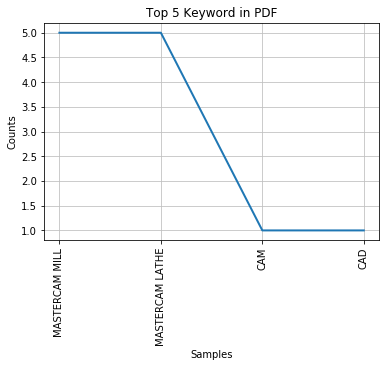

In [25]:
fd = nltk.FreqDist(keyword_found)
fd.plot(5, cumulative = False, title = 'Top 5 Keyword in PDF')
